# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count

len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information
    
base_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = weather_api_key
units = "imperial"

rawjson_list = []
city_list = []
lat_list = []
lng_list = []
temp_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []

In [4]:
# for loop for api calls

# we need to assure that we don't save "missing data" cities

for num,city in enumerate(cities[:50]):
        
    query_url = f"{base_url}appid={api_key}&q={city}&units={units}"

    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    weather_city = "BLANK"
    
    try:
        
        weather_city = weather_json["name"]
        

        weather_lat = weather_json["coord"]["lat"]
        weather_lng = weather_json["coord"]["lon"]
        
        
        weather_temp = weather_json["main"]["temp"]              # in Kelvin, need imperial (degrees F)
        
        
        weather_maxtemp = weather_json["main"]["temp_max"]              # in Kelvin, need imperial (degrees F)
        

        weather_humidity = weather_json["main"]["humidity"]      # not always provided (need try ... except), in %
        

        weather_cloudiness = weather_json["clouds"]["all"]       # in % 
        

        weather_windspeed = weather_json["wind"]["speed"]       # in meter/sec, need imperial (miles/hr)
        
                
    except:
        
        print(f"{num} Info missing for {weather_city} ... skipping!")
        continue        
    
    else:
        
        print(f"{num} Working on {weather_city} ...")
        
        rawjson_list.append(weather_json)
        city_list.append(weather_city)
        lat_list.append(weather_lat)
        lng_list.append(weather_lng)
        temp_list.append(weather_temp)
        maxtemp_list.append(weather_temp)
        humidity_list.append(weather_humidity)
        cloudiness_list.append(weather_cloudiness)
        windspeed_list.append(weather_windspeed)
    
    finally:
    
        time.sleep(1.5)

print(f"DONE!")

0 Info missing for BLANK ... skipping!
1 Working on Richards Bay ...
2 Working on Punta Arenas ...
3 Working on Hilo ...
4 Working on Salalah ...
5 Working on Kahului ...
6 Working on Arroio Grande ...
7 Working on Bredasdorp ...
8 Working on Mataura ...
9 Working on Albany ...
10 Working on Kutum ...
11 Working on High Level ...
12 Working on Ushuaia ...
13 Working on Verkhoyansk ...
14 Working on Hermanus ...
15 Working on Kaitangata ...
16 Working on Lavrentiya ...
17 Working on Atuona ...
18 Info missing for BLANK ... skipping!
19 Working on Thompson ...
20 Working on Hobart ...
21 Working on Gorontalo ...
22 Working on Rikitea ...
23 Working on Norman Wells ...
24 Working on Sterlibashevo ...
25 Working on Bouaké ...
26 Working on Warrnambool ...
27 Working on Tasiilaq ...
28 Info missing for BLANK ... skipping!
29 Working on George Town ...
30 Working on Busselton ...
31 Working on Gushikawa ...
32 Working on Fort Nelson ...
33 Working on Barrow ...
34 Working on Arraial do Cabo 

In [5]:
for rawjson in rawjson_list:
    pprint(rawjson)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -28.783, 'lon': 32.0377},
 'dt': 1659115227,
 'id': 962367,
 'main': {'feels_like': 70,
          'grnd_level': 1015,
          'humidity': 61,
          'pressure': 1016,
          'sea_level': 1016,
          'temp': 70.39,
          'temp_max': 70.39,
          'temp_min': 70.39},
 'name': 'Richards Bay',
 'sys': {'country': 'ZA', 'sunrise': 1659069433, 'sunset': 1659107953},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 26, 'gust': 31.38, 'speed': 14.92}}
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -53.15, 'lon': -70.9167},
 'dt': 1659115104,
 'id': 3874787,
 'main': {'feels_like': 29.88,
          'humidity': 72,
          'pressure': 990,
          'temp': 42.03,
          'temp_max': 44.62,
          'temp_min': 41.11},
 'name': 'Punta 

 'main': {'feels_like': 68.31,
          'humidity': 77,
          'pressure': 1006,
          'temp': 68.16,
          'temp_max': 68.16,
          'temp_min': 68.16},
 'name': 'Thompson',
 'sys': {'country': 'CA',
         'id': 935,
         'sunrise': 1659090681,
         'sunset': 1659149053,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 260, 'speed': 12.66}}
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': -42.8794, 'lon': 147.3294},
 'dt': 1659115163,
 'id': 2163355,
 'main': {'feels_like': 33.84,
          'humidity': 84,
          'pressure': 1019,
          'temp': 39.87,
          'temp_max': 42.66,
          'temp_min': 38.26},
 'name': 'Hobart',
 'rain': {'1h': 0.28},
 'sys': {'country': 'AU',
         'id': 2002195,
         'sunrise': 1659129897,
         'sunset': 1659164947,

 'cod': 200,
 'coord': {'lat': 64.2539, 'lon': -15.2082},
 'dt': 1659115295,
 'id': 2630299,
 'main': {'feels_like': 50.79,
          'humidity': 87,
          'pressure': 1002,
          'temp': 51.82,
          'temp_max': 51.82,
          'temp_min': 51.82},
 'name': 'Hofn',
 'sys': {'country': 'IS',
         'id': 76,
         'sunrise': 1659066993,
         'sunset': 1659133070,
         'type': 1},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 3.44}}
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 64.3833, 'lon': -173.3},
 'dt': 1659115296,
 'id': 4031574,
 'main': {'feels_like': 41.77,
          'grnd_level': 1021,
          'humidity': 85,
          'pressure': 1021,
          'sea_level': 1021,
          'temp': 46.67,
          'temp_max': 46.67,
          'temp_min': 46.67},
 'name': 'Provid

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(rawjson_list)

47

In [7]:
   
# Set up df
    
data = {
        "CITY": [],
        "LAT": [],
        "LNG": [],
        "TEMP": [],
        "MAXTEMP": [],
        "HUMIDITY": [],
        "CLOUDINESS": [],
        "WINDSPEED": [],
        }

cityweather_df = pd.DataFrame(data=data)
    
cityweather_df["CITY"] = city_list
cityweather_df["LAT"] = lat_list
cityweather_df["LNG"] = lng_list
cityweather_df["TEMP"] = temp_list
cityweather_df["MAXTEMP"] = maxtemp_list
cityweather_df["HUMIDITY"] = humidity_list
cityweather_df["CLOUDINESS"] = cloudiness_list
cityweather_df["WINDSPEED"] = windspeed_list

cityweather_df
cityweather_df.to_csv("../output_data/cities.csv", encoding="utf=8")

In [8]:
cityweather_df.dtypes

CITY           object
LAT           float64
LNG           float64
TEMP          float64
MAXTEMP       float64
HUMIDITY        int64
CLOUDINESS      int64
WINDSPEED     float64
dtype: object

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
(cityweather_df

     .HUMIDITY
     .gt(100)
     .sum()
)

0

In [10]:
#  Get the indices of cities that have humidity over 100%.


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

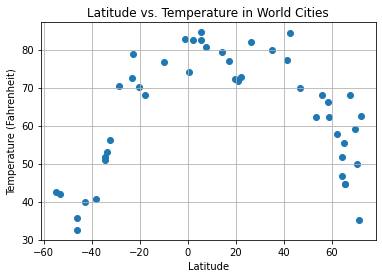

In [12]:
plt.scatter(cityweather_df["LAT"], cityweather_df["TEMP"], marker="o")

plt.title("Latitude vs. Temperature in World Cities")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

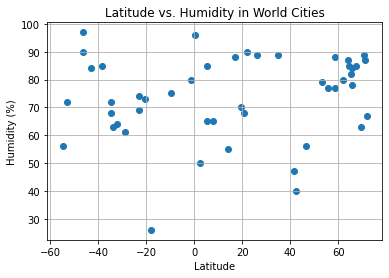

In [13]:
plt.scatter(cityweather_df["LAT"], cityweather_df["HUMIDITY"], marker="o")

plt.title("Latitude vs. Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

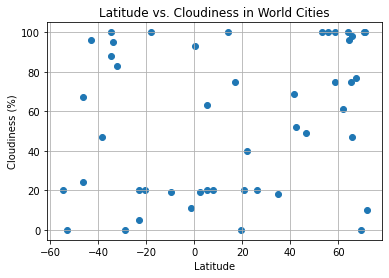

In [14]:
plt.scatter(cityweather_df["LAT"], cityweather_df["CLOUDINESS"], marker="o")

plt.title("Latitude vs. Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

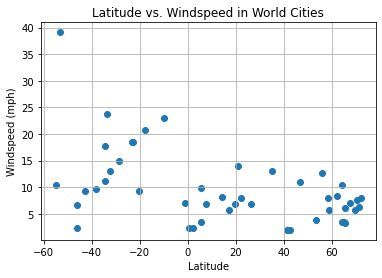

In [15]:
plt.scatter(cityweather_df["LAT"], cityweather_df["WINDSPEED"], marker="o")

plt.title("Latitude vs. Windspeed in World Cities")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()

## Linear Regression

In [16]:
cityweather_df["HEMISPHERE"] = 0

# assign 1 to Northern Hemisphere cities

cityweather_df.loc[(cityweather_df["LAT"] >= 0), "HEMISPHERE"] = 1

northern_latitudes = cityweather_df["HEMISPHERE"] == 1
southern_latitudes = cityweather_df["HEMISPHERE"] == 0

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

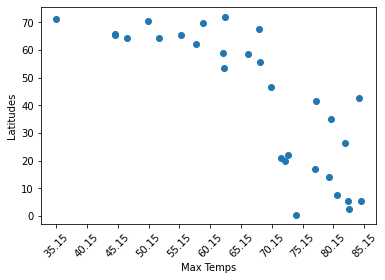

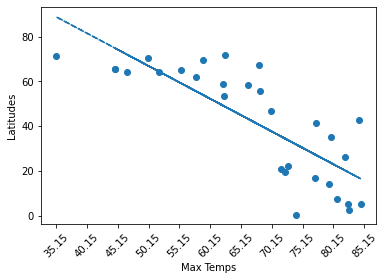

In [17]:
maxtemps = cityweather_df[northern_latitudes]["MAXTEMP"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(maxtemps, latitudes)
plt.xticks(np.arange(min(maxtemps), max(maxtemps)+1, 5.0), rotation=45)
plt.xlabel("Max Temps")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(maxtemps, latitudes) 

a_fit = a_slope * maxtemps + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(maxtemps, latitudes)
plt.plot(maxtemps, a_fit, "--")

plt.xticks(np.arange(min(maxtemps), max(maxtemps)+1, 5.0), rotation=45)

# plt.xticks(maxtemps, rotation=90)

plt.xlabel("Max Temps")
plt.ylabel("Latitudes")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

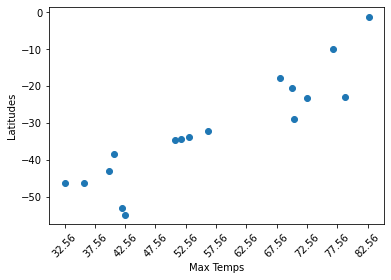

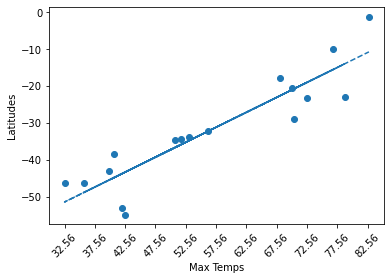

In [18]:
maxtemps = cityweather_df[southern_latitudes]["MAXTEMP"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(maxtemps, latitudes)
plt.xticks(np.arange(min(maxtemps), max(maxtemps)+1, 5.0), rotation=45)
plt.xlabel("Max Temps")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(maxtemps, latitudes) 

a_fit = a_slope * maxtemps + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(maxtemps, latitudes)
plt.plot(maxtemps, a_fit, "--")
plt.xticks(np.arange(min(maxtemps), max(maxtemps)+1, 5.0), rotation=45)
plt.xlabel("Max Temps")
plt.ylabel("Latitudes")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

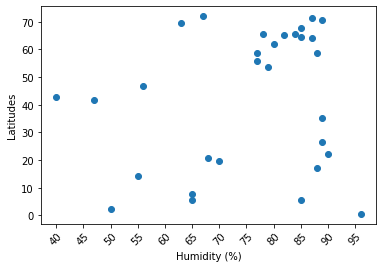

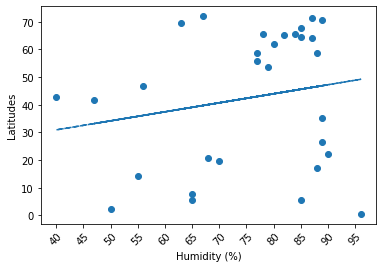

In [19]:
humidities = cityweather_df[northern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(humidities, latitudes)
plt.xticks(np.arange(min(humidities), max(humidities)+1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(humidities, latitudes) 

a_fit = a_slope * humidities + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(humidities, latitudes)
plt.plot(humidities, a_fit, "--")
plt.xticks(np.arange(min(humidities), max(humidities)+1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

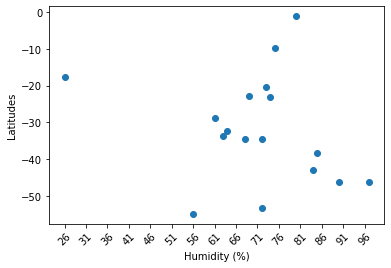

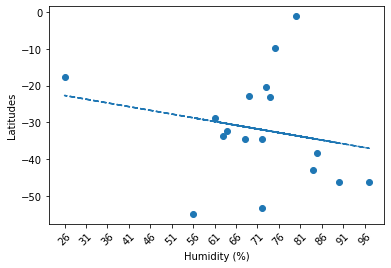

In [20]:
humidities = cityweather_df[southern_latitudes]["HUMIDITY"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(humidities, latitudes)
plt.xticks(np.arange(min(humidities), max(humidities)+1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(humidities, latitudes) 

a_fit = a_slope * humidities + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(humidities, latitudes)
plt.plot(humidities, a_fit, "--")
plt.xticks(np.arange(min(humidities), max(humidities)+1, 5.0), rotation=45)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitudes")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

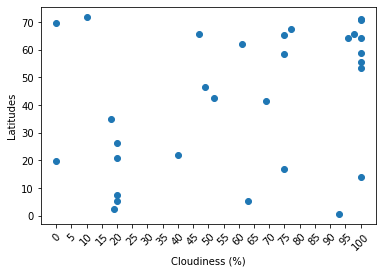

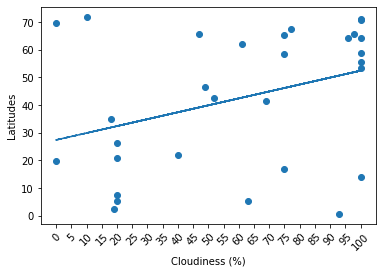

In [21]:
cloudinesses = cityweather_df[northern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(cloudinesses, latitudes)
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses)+1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(cloudinesses, latitudes) 

a_fit = a_slope * cloudinesses + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(cloudinesses, latitudes)
plt.plot(cloudinesses, a_fit, "--")
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses)+1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

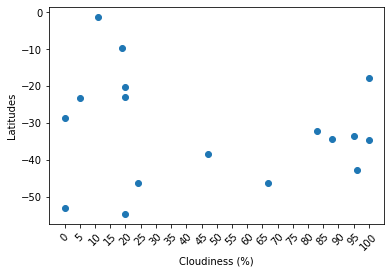

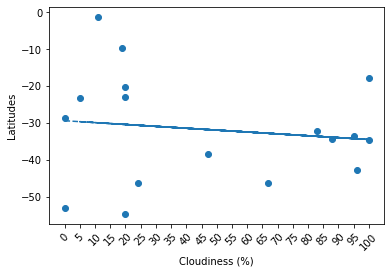

In [22]:
cloudinesses = cityweather_df[southern_latitudes]["CLOUDINESS"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(cloudinesses, latitudes)
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses)+1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(cloudinesses, latitudes) 

a_fit = a_slope * cloudinesses + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(cloudinesses, latitudes)
plt.plot(cloudinesses, a_fit, "--")
plt.xticks(np.arange(min(cloudinesses), max(cloudinesses)+1, 5.0), rotation=45)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitudes")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

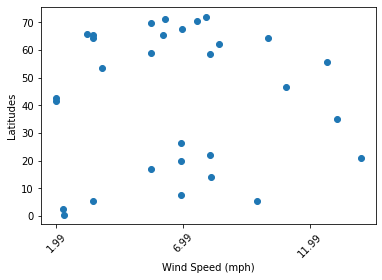

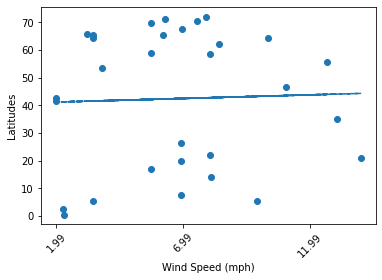

In [23]:
windspeeds = cityweather_df[northern_latitudes]["WINDSPEED"]
latitudes = cityweather_df[northern_latitudes]["LAT"]

plt.scatter(windspeeds, latitudes)
plt.xticks(np.arange(min(windspeeds), max(windspeeds)+1, 5.0), rotation=45)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(windspeeds, latitudes) 

a_fit = a_slope * windspeeds + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(windspeeds, latitudes)
plt.plot(windspeeds, a_fit, "--")
plt.xticks(np.arange(min(windspeeds), max(windspeeds)+1, 5.0), rotation=45)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitudes")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

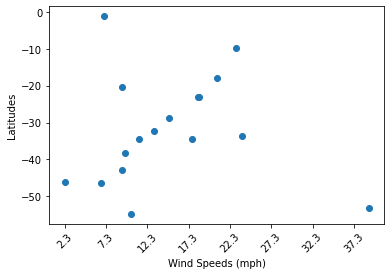

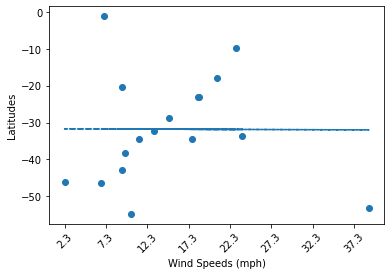

In [24]:
windspeeds = cityweather_df[southern_latitudes]["WINDSPEED"]
latitudes = cityweather_df[southern_latitudes]["LAT"]

plt.scatter(windspeeds, latitudes)
plt.xticks(np.arange(min(windspeeds), max(windspeeds)+1, 5.0), rotation=45)
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitudes")
plt.show()

a_slope, a_int, a_r, a_p, a_std_err = linregress(windspeeds, latitudes) 

a_fit = a_slope * windspeeds + a_int 

 # Plot the linear model on top of scatter plot 
    
plt.scatter(windspeeds, latitudes)
plt.plot(windspeeds, a_fit, "--")
plt.xticks(np.arange(min(windspeeds), max(windspeeds)+1, 5.0), rotation=45)
plt.xlabel("Wind Speeds (mph)")
plt.ylabel("Latitudes")
plt.show()